# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [1]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')

df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [4]:
df["AgeGroup"] = "Unknown"

# Categorize Age into bins using .loc (as required)
df.loc[df["Age"] < 13, "AgeGroup"] = "Child"
df.loc[(df["Age"] >= 13) & (df["Age"] < 20), "AgeGroup"] = "Teen"
df.loc[(df["Age"] >= 20) & (df["Age"] < 40), "AgeGroup"] = "Adult"
df.loc[(df["Age"] >= 40) & (df["Age"] < 60), "AgeGroup"] = "Middle_Aged"
df.loc[df["Age"] >= 60, "AgeGroup"] = "Senior"

df["AgeGroup"].value_counts(dropna=False)


AgeGroup
Adult          387
Unknown        177
Middle_Aged    137
Teen            95
Child           69
Senior          26
Name: count, dtype: int64

In [5]:
df["FareGroup"] = "Unknown"

# Use quartiles from describe() to define Low/Medium/High/Very_High
df.loc[df["Fare"] <= 7.91, "FareGroup"] = "Low"
df.loc[(df["Fare"] > 7.91) & (df["Fare"] <= 14.45), "FareGroup"] = "Medium"
df.loc[(df["Fare"] > 14.45) & (df["Fare"] <= 31.00), "FareGroup"] = "High"
df.loc[df["Fare"] > 31.00, "FareGroup"] = "Very_High"

df["FareGroup"].value_counts(dropna=False)


FareGroup
High         229
Low          223
Very_High    222
Medium       217
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt

In [7]:
sex_surv_counts = pd.crosstab(df["Sex"], df["Survived"])
sex_surv_counts


Survived,0,1
Sex,,
female,81,233
male,468,109


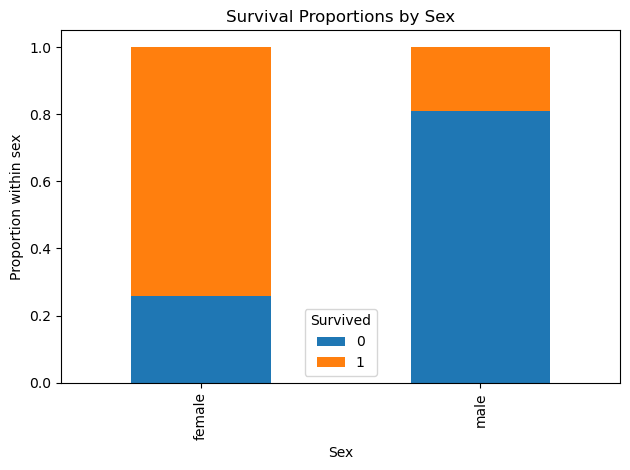

In [8]:
ax = (pd.crosstab(df["Sex"], df["Survived"], normalize="index")
        .plot(kind="bar", stacked=True))

ax.set_title("Survival Proportions by Sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Proportion within sex")
plt.tight_layout()
plt.show()


In [9]:
pclass_surv_counts = pd.crosstab(df["Pclass"], df["Survived"])
pclass_surv_counts


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


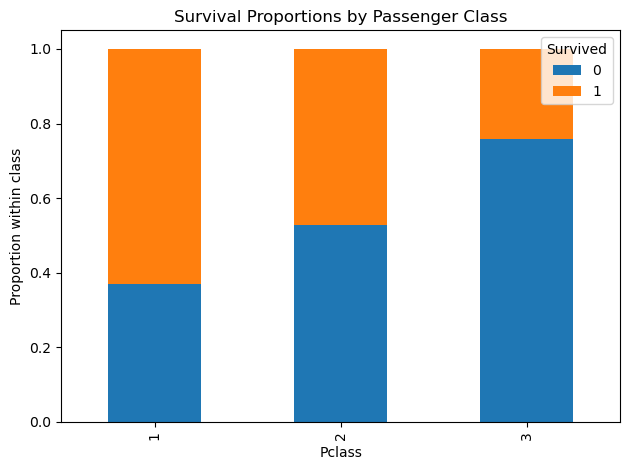

In [10]:
ax = (pd.crosstab(df["Pclass"], df["Survived"], normalize="index")
        .plot(kind="bar", stacked=True))

ax.set_title("Survival Proportions by Passenger Class")
ax.set_xlabel("Pclass")
ax.set_ylabel("Proportion within class")
plt.tight_layout()
plt.show()


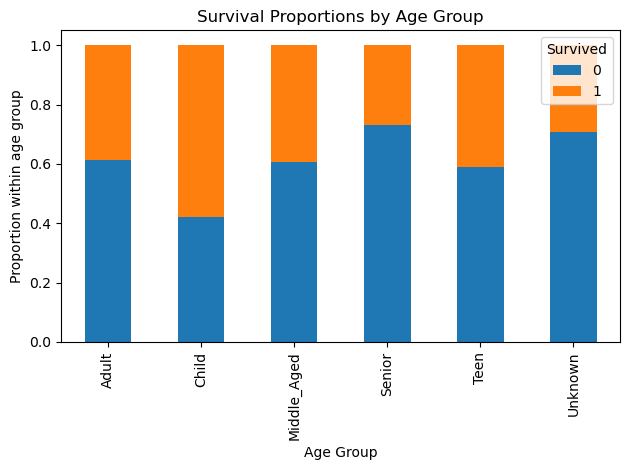

In [11]:
ax = (pd.crosstab(df["AgeGroup"], df["Survived"], normalize="index")
        .plot(kind="bar", stacked=True))

ax.set_title("Survival Proportions by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Proportion within age group")
plt.tight_layout()
plt.show()


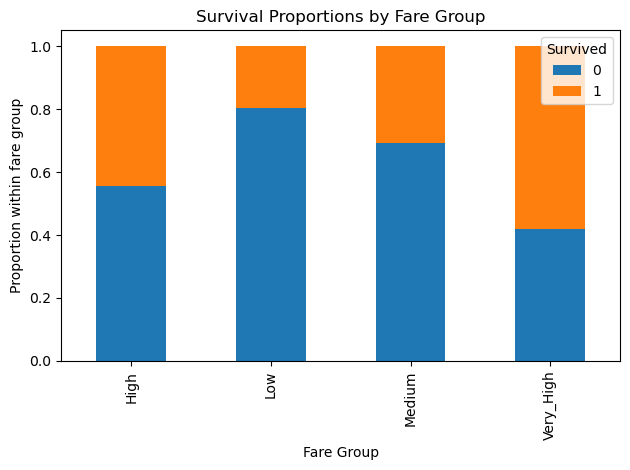

In [12]:
ax = (pd.crosstab(df["FareGroup"], df["Survived"], normalize="index")
        .plot(kind="bar", stacked=True))

ax.set_title("Survival Proportions by Fare Group")
ax.set_xlabel("Fare Group")
ax.set_ylabel("Proportion within fare group")
plt.tight_layout()
plt.show()


In [13]:
df["FamilyAboard"] = df["SibSp"] + df["Parch"]

df["TravelGroup"] = "Unknown"
df.loc[df["FamilyAboard"] == 0, "TravelGroup"] = "Alone"
df.loc[df["FamilyAboard"] == 1, "TravelGroup"] = "With_1_Family"
df.loc[df["FamilyAboard"] >= 2, "TravelGroup"] = "With_2plus_Family"

df["TravelGroup"].value_counts(dropna=False)


TravelGroup
Alone                537
With_2plus_Family    193
With_1_Family        161
Name: count, dtype: int64

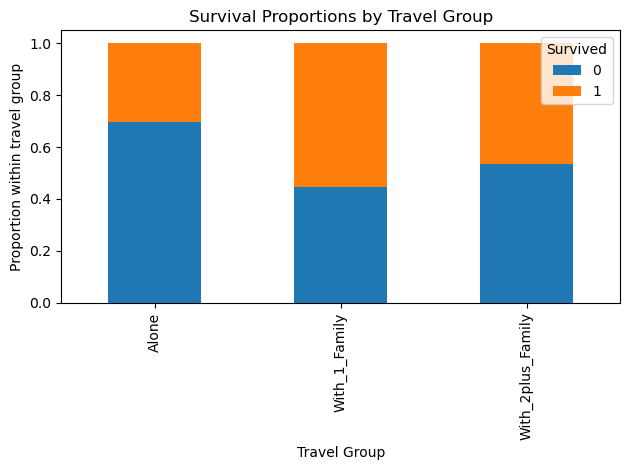

In [14]:
ax = (pd.crosstab(df["TravelGroup"], df["Survived"], normalize="index")
        .plot(kind="bar", stacked=True))

ax.set_title("Survival Proportions by Travel Group")
ax.set_xlabel("Travel Group")
ax.set_ylabel("Proportion within travel group")
plt.tight_layout()
plt.show()


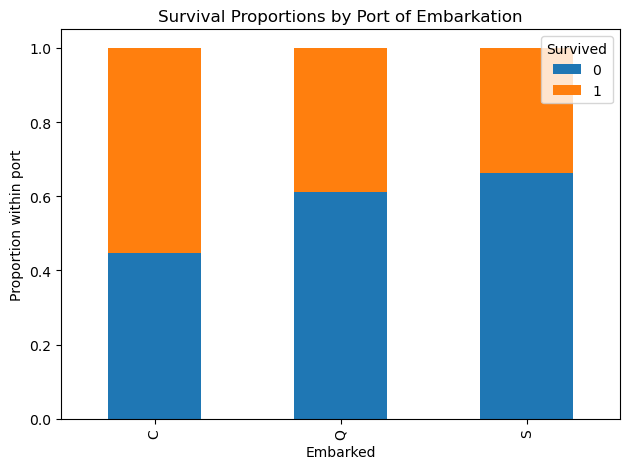

In [15]:
ax = (pd.crosstab(df["Embarked"], df["Survived"], normalize="index")
        .plot(kind="bar", stacked=True))

ax.set_title("Survival Proportions by Port of Embarkation")
ax.set_xlabel("Embarked")
ax.set_ylabel("Proportion within port")
plt.tight_layout()
plt.show()


## Character Profile 1 — Most Likely to Survive

Based on the visualizations:

- Sex: Female  
- Passenger Class: 1  
- Age Group: Adult  
- Fare Group: Very_High  
- Travel Group: With_1_Family  
- Embarked: C  

Justification:
The plots show that females had a much higher survival rate.
First-class passengers had the highest survival proportion.
Higher fare groups were strongly associated with survival.
Passengers with small family groups survived more than large groups.
Port C had higher survival compared to other ports.

---

## Character Profile 2 — Least Likely to Survive

Based on the visualizations:

- Sex: Male  
- Passenger Class: 3  
- Age Group: Adult  
- Fare Group: Low  
- Travel Group: Alone  
- Embarked: S  

Justification:
Males had much lower survival rates.
Third-class passengers had the lowest survival proportion.
Low fare passengers were strongly associated with non-survival.
Passengers traveling alone had lower survival than some family groups.
Port S had lower survival compared to Port C.


In [ ]:
# Example: MOST likely profile filter (edit these values based on your results)
most_profile = df[
    (df["Sex"] == "female") &
    (df["Pclass"] == 1) &
    (df["FareGroup"].isin(["High", "Very_High"])) &
    (df["AgeGroup"].isin(["Adult", "Middle_Aged"])) &
    (df["TravelGroup"].isin(["Alone", "With_1_Family"])) &
    (df["Embarked"] == "C")
]

# Print a few matching names
most_profile[["Name", "Sex", "Pclass", "Age", "Fare", "SibSp", "Parch", "Embarked", "Survived"]].head(5)


In [18]:
# Example: LEAST likely profile filter (edit based on your results)
least_profile = df[
    (df["Sex"] == "male") &
    (df["Pclass"] == 3) &
    (df["FareGroup"] == "Low") &
    (df["AgeGroup"].isin(["Adult", "Middle_Aged"])) &
    (df["TravelGroup"] == "Alone") &
    (df["Embarked"].isin(["S", "Q"]))
]

least_profile[["Name", "Sex", "Pclass", "Age", "Fare", "SibSp", "Parch", "Embarked", "Survived"]].head(5)


,Name,Sex,Pclass,Age,Fare,SibSp,Parch,Embarked,Survived
51,"Nosworthy, Mr. Richard Cater",male,3,21.0,7.8000,0,0,S,0
75,"Moen, Mr. Sigurd Hansen",male,3,25.0,7.6500,0,0,S,0
91,"Andreasson, Mr. Paul Edvin",male,3,20.0,7.8542,0,0,S,0
94,"Coxon, Mr. Daniel",male,3,59.0,7.2500,0,0,S,0
105,"Mionoff, Mr. Stoytcho",male,3,28.0,7.8958,0,0,S,0


## Real Passenger — Most Likely to Survive Profile

**Name:** Cummings, Mrs. John Bradley (Florence Briggs Thayer)  
**Profile Type:** Most Likely to Survive  

This passenger matches the high-survival profile identified in the analysis:

- Sex: Female  
- Passenger Class: 1 (First Class)  
- Age: 35 years  
- Fare: £71 5s 8d  
- Cabin: C85  
- Travel Group: Traveling with husband  
- Embarked: Cherbourg (C)  
- Survival Outcome: Survived (Lifeboat 4)

**Interesting Fact:**  
After being rescued in Lifeboat 4, Florence Cummings refused to leave her husband when evacuation began and only entered the lifeboat after he assured her he would follow later. He perished in the disaster. She later lived in New York and was buried with a memorial honoring her husband.

**Source:** Encyclopedia Titanica  

---

## Real Passenger — Least Likely to Survive Profile

**Name:** Nosworthy, Mr. Richard Cater  
**Profile Type:** Least Likely to Survive  

This passenger matches the low-survival profile identified in the analysis:

- Sex: Male  
- Passenger Class: 3 (Third Class)  
- Age: 21 years  
- Fare: £7 16s  
- Marital Status: Single  
- Occupation: Farm Labourer  
- Travel Group: Traveling Alone  
- Embarked: Southampton (S)  
- Survival Outcome: Died in the Titanic disaster (15 April 1912)

**Interesting Fact:**  
Richard Nosworthy originally booked passage on the *Olympic*, but due to travel disruption he transferred to the *Titanic*. He was only 21 years old and was believed to be traveling to North America in search of opportunity.

**Source:** Encyclopedia Titanica  
